In [23]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv('NYCT_AWARDS_TROPICAL_HARDWOODS.csv')
df.head()

,Unit,PO/Contract,PO_ID,Item description,Vendor Name,PO Date,Award Process,Item,Total Value
0,NYCTA,Contract,0600000000000000000007289,"BLOCK, TIE TROPICAL HARDWOOD, 5"" X 7"" X 34"". S...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/26/2014,Competitive Bid,66-08-0415,"$89,227.20"
1,NYCTA,Contract,0600000000000000000007290,"TIE, 5"" X 7"" X 9', TROPICAL HARDWOOD, SHALL CO...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/26/2014,Competitive Bid,66-65-0320,"$418,677.00"
2,NYCTA,Contract,0600000000000000000007301,"TIE, 5""X 8"" X 9'-6"", TROPICAL HARDWOOD, SHALL ...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/27/2014,Competitive Bid,66-65-0352,"$258,835.50"
3,NYCTA,PO,6030121313,"BLOCK, TIE TROPICAL HARDWOOD, 5"" X 7"" X 24"". S...","WILLIAM G. MOORE & SON, INC. OF DELWARE",3/25/2014,NaN,66-08-0410,"$16,022.16"
4,NYCTA,Contract,0600000000000000000008164,"TIE, 6"" X 8"" X 10', TROPICAL HARDWOOD, SHALL C...","WILLIAM G. MOORE & SON, INC. OF DELWARE",6/5/2014,Competitive Bid,66-65-1900,"$71,222.80"


In [4]:
df['Total Value'] = df['Total Value'].str.replace('$', '')
df.head()

,Unit,PO/Contract,PO_ID,Item description,Vendor Name,PO Date,Award Process,Item,Total Value
0,NYCTA,Contract,0600000000000000000007289,"BLOCK, TIE TROPICAL HARDWOOD, 5"" X 7"" X 34"". S...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/26/2014,Competitive Bid,66-08-0415,"89,227.20"
1,NYCTA,Contract,0600000000000000000007290,"TIE, 5"" X 7"" X 9', TROPICAL HARDWOOD, SHALL CO...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/26/2014,Competitive Bid,66-65-0320,"418,677.00"
2,NYCTA,Contract,0600000000000000000007301,"TIE, 5""X 8"" X 9'-6"", TROPICAL HARDWOOD, SHALL ...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/27/2014,Competitive Bid,66-65-0352,"258,835.50"
3,NYCTA,PO,6030121313,"BLOCK, TIE TROPICAL HARDWOOD, 5"" X 7"" X 24"". S...","WILLIAM G. MOORE & SON, INC. OF DELWARE",3/25/2014,NaN,66-08-0410,"16,022.16"
4,NYCTA,Contract,0600000000000000000008164,"TIE, 6"" X 8"" X 10', TROPICAL HARDWOOD, SHALL C...","WILLIAM G. MOORE & SON, INC. OF DELWARE",6/5/2014,Competitive Bid,66-65-1900,"71,222.80"


In [6]:
df['Total Value'] = df['Total Value'].str.replace(',', '')
df.head()

,Unit,PO/Contract,PO_ID,Item description,Vendor Name,PO Date,Award Process,Item,Total Value
0,NYCTA,Contract,0600000000000000000007289,"BLOCK, TIE TROPICAL HARDWOOD, 5"" X 7"" X 34"". S...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/26/2014,Competitive Bid,66-08-0415,89227.20
1,NYCTA,Contract,0600000000000000000007290,"TIE, 5"" X 7"" X 9', TROPICAL HARDWOOD, SHALL CO...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/26/2014,Competitive Bid,66-65-0320,418677.00
2,NYCTA,Contract,0600000000000000000007301,"TIE, 5""X 8"" X 9'-6"", TROPICAL HARDWOOD, SHALL ...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/27/2014,Competitive Bid,66-65-0352,258835.50
3,NYCTA,PO,6030121313,"BLOCK, TIE TROPICAL HARDWOOD, 5"" X 7"" X 24"". S...","WILLIAM G. MOORE & SON, INC. OF DELWARE",3/25/2014,NaN,66-08-0410,16022.16
4,NYCTA,Contract,0600000000000000000008164,"TIE, 6"" X 8"" X 10', TROPICAL HARDWOOD, SHALL C...","WILLIAM G. MOORE & SON, INC. OF DELWARE",6/5/2014,Competitive Bid,66-65-1900,71222.80


In [8]:
df['Item description'] = df['Item description'].str.lower()
df.head()

,Unit,PO/Contract,PO_ID,Item description,Vendor Name,PO Date,Award Process,Item,Total Value
0,NYCTA,Contract,0600000000000000000007289,"block, tie tropical hardwood, 5"" x 7"" x 34"". s...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/26/2014,Competitive Bid,66-08-0415,89227.20
1,NYCTA,Contract,0600000000000000000007290,"tie, 5"" x 7"" x 9', tropical hardwood, shall co...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/26/2014,Competitive Bid,66-65-0320,418677.00
2,NYCTA,Contract,0600000000000000000007301,"tie, 5""x 8"" x 9'-6"", tropical hardwood, shall ...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/27/2014,Competitive Bid,66-65-0352,258835.50
3,NYCTA,PO,6030121313,"block, tie tropical hardwood, 5"" x 7"" x 24"". s...","WILLIAM G. MOORE & SON, INC. OF DELWARE",3/25/2014,NaN,66-08-0410,16022.16
4,NYCTA,Contract,0600000000000000000008164,"tie, 6"" x 8"" x 10', tropical hardwood, shall c...","WILLIAM G. MOORE & SON, INC. OF DELWARE",6/5/2014,Competitive Bid,66-65-1900,71222.80


In [20]:
import re

df['Use'] = df['Item description'].str.extract(r'(.*tie)')
#df.head(20)

In [14]:
df['Use'].value_counts()

Use
tie           114
block, tie     28
Name: count, dtype: int64

In [15]:
df['Vendor Name'].value_counts()

Vendor Name
WILLIAM G. MOORE & SON, INC. OF DELWARE    69
BORO SAWMILL & TIMBER CO INC               58
J MIKULSKY RAILWAY SUPPLY CO INC           15
Name: count, dtype: int64

In [19]:
df['Year'] = df['PO Date'].str.extract(r'\d{1,2}/\d{1,2}/(\d{4})')
#df.tail(20)

In [21]:
df.head()

,Unit,PO/Contract,PO_ID,Item description,Vendor Name,PO Date,Award Process,Item,Total Value,Use,Year
0,NYCTA,Contract,0600000000000000000007289,"block, tie tropical hardwood, 5"" x 7"" x 34"". s...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/26/2014,Competitive Bid,66-08-0415,89227.20,"block, tie",2014
1,NYCTA,Contract,0600000000000000000007290,"tie, 5"" x 7"" x 9', tropical hardwood, shall co...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/26/2014,Competitive Bid,66-65-0320,418677.00,tie,2014
2,NYCTA,Contract,0600000000000000000007301,"tie, 5""x 8"" x 9'-6"", tropical hardwood, shall ...","WILLIAM G. MOORE & SON, INC. OF DELWARE",2/27/2014,Competitive Bid,66-65-0352,258835.50,tie,2014
3,NYCTA,PO,6030121313,"block, tie tropical hardwood, 5"" x 7"" x 24"". s...","WILLIAM G. MOORE & SON, INC. OF DELWARE",3/25/2014,NaN,66-08-0410,16022.16,"block, tie",2014
4,NYCTA,Contract,0600000000000000000008164,"tie, 6"" x 8"" x 10', tropical hardwood, shall c...","WILLIAM G. MOORE & SON, INC. OF DELWARE",6/5/2014,Competitive Bid,66-65-1900,71222.80,tie,2014


In [131]:
df['Vendor Name'] = df['Vendor Name'].str.replace('WILLIAM G. MOORE & SON, INC. OF DELWARE', 'William G. Moore & Son, Inc. of Delaware')

In [132]:
df['Vendor Name'] = df['Vendor Name'].str.replace('BORO SAWMILL & TIMBER CO INC', 'Boro Sawmill & Timber Co.')

In [133]:
df['Vendor Name'] = df['Vendor Name'].str.replace('J MIKULSKY RAILWAY SUPPLY CO INC', 'J. Mikulsky Railway Supply Co, Inc.')

In [167]:
df.groupby('Year')['Use'].value_counts()

Year  Use       
2014  tie           25
      block, tie     5
2015  tie            8
      block, tie     3
2016  tie           10
      block, tie     6
2017  tie           19
      block, tie     1
2018  tie           34
      block, tie     2
2019  tie            6
      block, tie     2
2021  block, tie     2
2022  tie            3
      block, tie     2
2023  tie            6
      block, tie     5
2024  tie            3
Name: count, dtype: int64

In [160]:
df['Total Value'] = df['Total Value'].astype(float)

In [161]:
df.groupby('Use')['Total Value'].sum()

Use
block, tie     4667073.60
tie           10043181.22
Name: Total Value, dtype: float64

In [162]:
df.groupby('Use')['Total Value'].mean()

Use
block, tie    166681.200000
tie            88098.080877
Name: Total Value, dtype: float64

In [168]:
df.groupby('Use')['Total Value'].median()

Use
block, tie    97926.0
tie           56220.0
Name: Total Value, dtype: float64

In [134]:
df.to_csv('NYCTA_tropical_hardwoods_cleaned.csv', index=False)

In [135]:
%%R

#install.packages('tidyverse')
require('tidyverse')


In [136]:
%%R

# Read data
df <- read_csv('NYCTA_tropical_hardwoods_cleaned.csv')
df

Rows: 142 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Unit, PO/Contract, PO_ID, Item description, Vendor Name, PO Date, A...
dbl (2): Total Value, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 142 × 11
   Unit  `PO/Contract` PO_ID          `Item description` `Vendor Name` `PO Date`
   <chr> <chr>         <chr>          <chr>              <chr>         <chr>    
 1 NYCTA Contract      0600000000000… "block, tie tropi… William G. M… 2/26/2014
 2 NYCTA Contract      0600000000000… "tie, 5\" x 7\" x… William G. M… 2/26/2014
 3 NYCTA Contract      0600000000000… "tie, 5\"x 8\" x … William G. M… 2/27/2014
 4 NYCTA PO            6030121313     "block, tie tropi… William G. M… 3/25/2014
 5 NYCTA Contract      0600000000000… "tie, 6\" x 8\" x… William G. M… 6/5/2014 
 6 NYCTA Contract      060000000

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


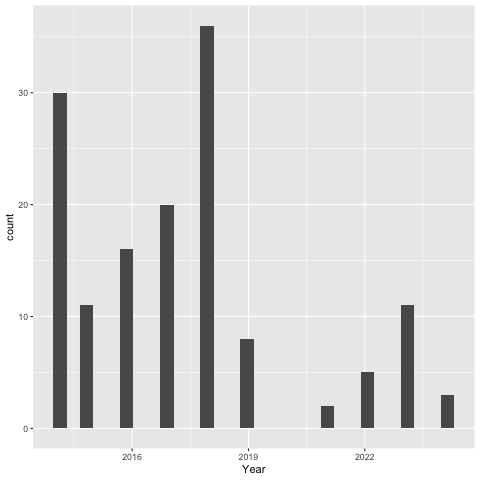

In [137]:
%%R

ggplot(df) +
    aes(x=`Year`) +
    geom_histogram() 

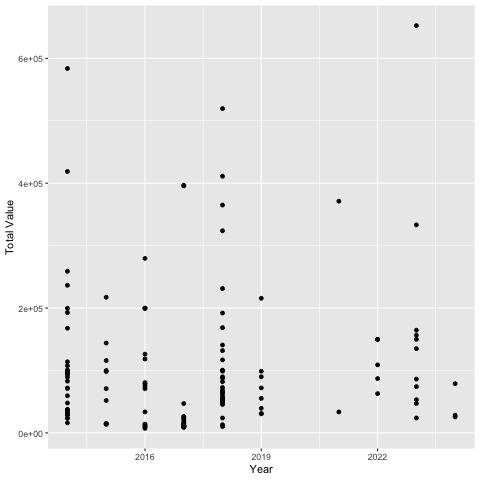

In [138]:
%%R

ggplot(df) +
    aes(x=Year, y=`Total Value`) +
    geom_point()

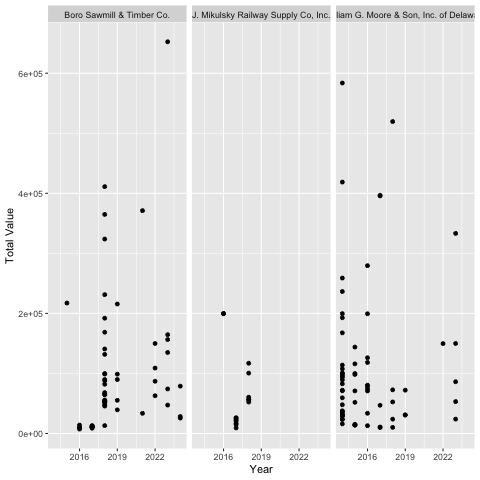

In [139]:
%%R

ggplot(df) +
    aes(x=Year, y=`Total Value`) +
    geom_point() +
    facet_wrap(vars(`Vendor Name`))

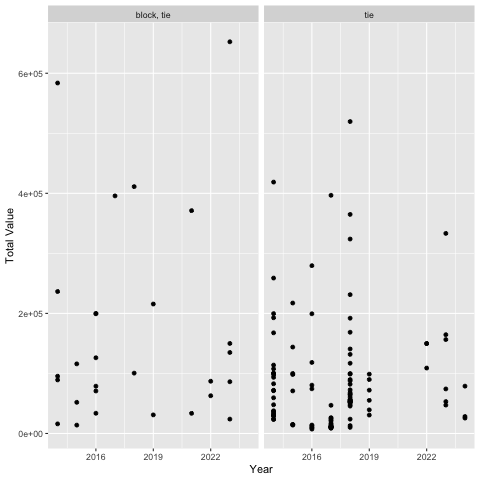

In [140]:
%%R

ggplot(df) +
    aes(x=Year, y=`Total Value`) +
    geom_point() +
    facet_wrap(vars(`Use`))

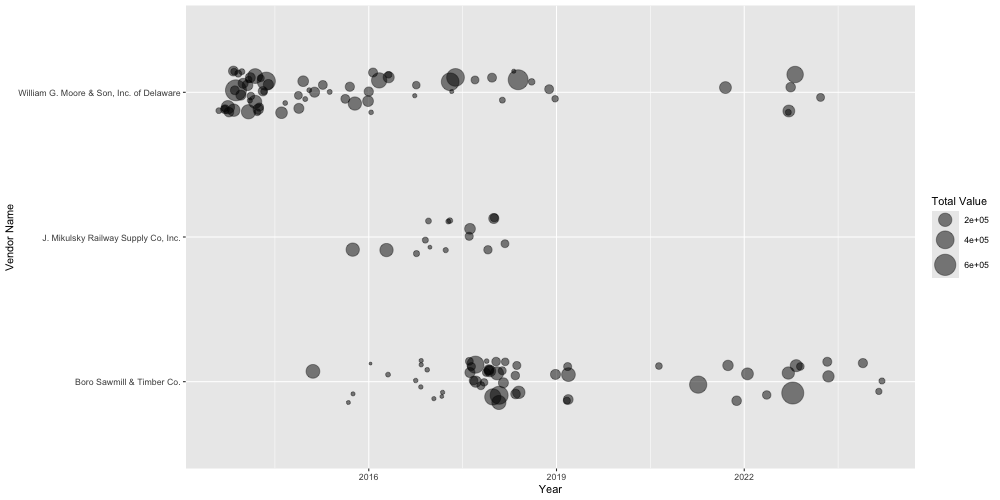

In [141]:
%%R -w 1000 -h 500

ggplot(df) +
    aes(x=Year, y=`Vendor Name`, size=`Total Value`) +
    geom_jitter(height=0.15, alpha=0.5) +
    scale_size(range = c(1, 10))

In [142]:
%%R

df %>% 
    group_by(`Year`) %>%
    summarize(
        count = n(),
        mean=mean(`Total Value`), 
        median=median(`Total Value`),
        sum=sum(`Total Value`),
        standard_deviation=sd(`Total Value`))

# A tibble: 10 × 6
    Year count    mean  median      sum standard_deviation
   <dbl> <int>   <dbl>   <dbl>    <dbl>              <dbl>
 1  2014    30 116088.  86011. 3482629.            124820.
 2  2015    11  77792.  70923   855715.             65554.
 3  2016    16  94668.  76606. 1514690.             85284.
 4  2017    20  54226.  12561. 1084515.            117304.
 5  2018    36 115786.  66745  4168304.            116167.
 6  2019     8  79069.  63670.  632553.             60939.
 7  2021     2 202355. 202355.  404710.            238695.
 8  2022     5 111663. 108936   558317.             38418.
 9  2023    11 170560. 134895  1876165.            180967.
10  2024     3  44219.  28278.  132657.             29983.


In [143]:
%%R

install.packages("scales")
library(scales)


The downloaded binary packages are in
	/var/folders/mb/f5zh4qyd6sbf171lrlnmff040000gn/T//RtmpCwnkCX/downloaded_packages


trying URL 'https://cran.wustl.edu/bin/macosx/big-sur-arm64/contrib/4.4/scales_1.3.0.tgz'
Content type 'application/x-gzip' length 710409 bytes (693 KB)
downloaded 693 KB



In [303]:
%%R -w 750 -h 600

df <- df %>%
  complete(Year = full_seq(2020:2022, 1), `Vendor Name`, fill = list(`Total Value` = 0))

ggplot(df, aes(x = factor(Year), y = `Total Value`/ 1e6, fill = `Vendor Name`)) +
    geom_bar(stat = "identity") +
    annotate("text", x = 7.5, y = 0.8, label = "Covid-19", size = 5, color = "black") +
    annotate("segment", 
           x = 7.2, y = 0.65, xend = 7, yend = 0.3,  
           arrow = arrow(type = "closed", length = unit(0.1, "inches")),  
           color = "black", size = 0.2) +  
    annotate("text", x = 9.6, y = 2.8, label = "TREES Act passes state legislature\n but is vetoed twice by Gov. Hochul", size = 5, color = "black") +
    annotate("segment", 
           x = 10.2, y = 2.5, xend = 10, yend = 2.1,  
           arrow = arrow(type = "closed", length = unit(0.1, "inches")),  
           color = "black", size = 0.2) +  
    annotate("segment", 
           x = 10.8, y = 2.5, xend = 11, yend = 1,  
           arrow = arrow(type = "closed", length = unit(0.1, "inches")),  
           color = "black", size = 0.2) + 
    scale_fill_manual(values = c("William G. Moore & Son, Inc. of Delaware" = "#77CFA0", "Boro Sawmill & Timber Co." = "#04A771", "J. Mikulsky Railway Supply Co, Inc." = "#BED99F")) +
    labs(
        title = "In 1993, New York banned purchases of most wood from tropical forests. \nTwenty years later, the MTA is still buying it for NYC Subway tracks.",
        subtitle = "New York City Transit Authority purchases of tropical forest hardwood for NYC Subway ties and blocks",
        x = NULL,
        y = "Total Purchase Value (Million USD)",
        caption = "*The Tropical Rainforest Economic & Environmental Sustainability (TREES) Act would have given the MTA an exemption until 2030 to transition from the use of tropical hardwood. \n Chart by Annika McGinnis. Source: NYC Metropolitan Transit Authority",
        fill = "Vendor") +
    scale_y_continuous(labels = scales::comma) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 20, face = "bold"),
        plot.subtitle = element_text(size = 14, margin = margin(t = 5)),
        plot.title.position = "panel",
        plot.caption = element_text(margin = margin(t = 20)),
        plot.margin = margin(t = 20, b = 20, r = 10, l = 10),

        legend.position = "top",
        legend.direction = "horizontal",
        legend.text = element_text(size = 10), 
        legend.title = element_text(size = 11, face = "bold"),
        legend.spacing = unit(1, "cm"),
        legend.justification = "left", 
        legend.box.margin = margin(t = 5),

        axis.title.y = element_text(size = 14, margin = margin(r = 20))
)    

ggsave("timber_mta.png", width = 7.5, height = 6, units = "in", dpi = 300, scale = 1.5)

In [169]:
# %%R -w 1000 -h 600

# ggplot(df, aes(x = Year, y = `Total Value`, fill = `Vendor Name`)) +
#   geom_area(position = "stack") +
#   labs(title = "MTA's Purchases of Tropical Forest Hardwood for the NYC Subway",
#        x = "Year",
#        y = "Total Value of Purchases",
#        fill = "Company") +
#   theme_minimal()

In [170]:
# %%R -w 1000 -h 600

# ggplot(df, aes(x = Year, y = `Total Value`, fill = `Vendor Name`)) +
#   geom_bar(stat="identity", position = position_dodge(width = 0.8)) +  
#   labs(title = "", 
#        x = "Year", 
#        y = "Total Value", 
#        fill = "Vendor") +
#   theme_minimal()

In [71]:
%%R

install.packages("ggstream")
library(ggstream)

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Marseille) 

Selection:  66



The downloaded binary packages are in
	/var/folders/mb/f5zh4qyd6sbf171lrlnmff040000gn/T//RtmpCwnkCX/downloaded_packages


trying URL 'https://cran.wustl.edu/bin/macosx/big-sur-arm64/contrib/4.4/ggstream_0.1.0.tgz'
Content type 'application/x-gzip' length 50786 bytes (49 KB)
downloaded 49 KB

In addition: Warning message:
In doTryCatch(return(expr), name, parentenv, handler) :
  unable to load shared object '/Library/Frameworks/R.framework/Resources/modules//R_X11.so':
  dlopen(/Library/Frameworks/R.framework/Resources/modules//R_X11.so, 0x0006): Library not loaded: /opt/X11/lib/libSM.6.dylib
  Referenced from: <34C5A480-1AC4-30DF-83C9-30A913FC042E> /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/modules/R_X11.so
  Reason: tried: '/opt/X11/lib/libSM.6.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libSM.6.dylib' (no such file), '/opt/X11/lib/libSM.6.dylib' (no such file), '/usr/local/lib/libSM.6.dylib' (no such file), '/usr/lib/libSM.6.dylib' (no such file, not in dyld cache)


In [304]:
# %%R

# ggplot(df, aes(x = Year, y = `Total Value`, fill = `Vendor Name`)) +
#     geom_stream() +
#     labs(title = "Stacked Area Chart", x = "Year", y = "Total Value") +
#     theme_minimal()